# Generate (Rotated) Simple Shapes

The data generated by this notebook is used later to test Convolutional Neural Networks.

In [1]:
import os
import pickle
from PIL import Image, ImageDraw

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline



In [2]:
data_dir="../data/shapes/"
if not(os.path.exists(data_dir)):
    os.mkdir(data_dir)


In [3]:
def rotate(points,center,theta):
    X=  np.cos(theta)*points[:,0]+np.sin(theta)*points[:,1]+center[0]
    Y= -np.sin(theta)*points[:,0]+np.cos(theta)*points[:,1]+center[1]
    rotated= np.c_[X,Y]
    return rotated
def rectangle(drawable,center,color,theta,DS):
    points=np.array([(-DS,-DS),(-DS,+DS),(+DS,+DS),(+DS,-DS)])
    polygon(drawable,points,center,color,theta)
def circle(drawable,center,color,theta,DS):
    x=center[0]
    y=center[1]
    drawable.ellipse((x-DS, y-DS, x+DS, y+DS),fill=color,outline=color)
def triangle(drawable,center,color,theta,DS):
    points=np.array([(-DS, -DS), (DS, -DS),(0,DS)])
    polygon(drawable,points,center,color,theta)
def polygon(drawable,points,center,color,theta):
    rotated_points=rotate(points,center,theta)
    used_points=rotated_points.astype(np.int).flatten().tolist() # PIL does not accept numpy arrays
    #print("used points",used_points)
    drawable.polygon(used_points,fill=color,outline=color)

In [4]:
available_colors=["yellow","orange","cyan"]
available_shapes={"rectangle": rectangle,"circle":circle,"triangle":triangle}
def draw_all(drawable,centers,colors,shapes,thetas,DS):
    for i1 in range(len(centers)):
        drawer=available_shapes[shapes[i1]]
        center=centers[i1]
        color=colors[i1]
        theta=thetas[i1]
        drawer(drawable,center,color,theta,DS)

In [5]:
def create_geometry_sample(N0=5,S=200,DS=5):
    image= Image.new('RGB', (S, S),color="black")
    drawable = ImageDraw.Draw(image)
    N=stats.poisson.rvs(N0)
    shape_choices=list(available_shapes.keys())
    centers=np.empty((N,2),np.int)
    #print("N",N)
    for i1 in range(N):
        #print("\tgenerating ",i1)
        while 1:          
            c=np.random.uniform(DS*1.5,S-DS*1.5,2).astype(np.int) # 1.5 approx sqrt(2), to avoid rotated squares to touch edge
            #print("\t\tattempting ",c)
            good=True
            for i2 in range(i1):
                #print("\t\ttesting", i2)
                if (np.abs(c[0]-centers[i2,0])<2*DS+3) and  (np.abs(c[1]-centers[i2,1])<2*DS+3):
                    good=False
                    break
            if good:
                break
        #print("\tfound ",i1, c)
        centers[i1]=c
    colors=np.random.choice(available_colors,N)
    shapes=np.random.choice(shape_choices,N)
    thetas=np.random.uniform(0,2*np.pi,N)
    draw_all(drawable,centers,colors,shapes,thetas,DS)
    data=pd.DataFrame(data={"colors":colors,"shapes":shapes,"theta":thetas,"center_x":centers[:,0],"center_y":centers[:,1]})
    return np.array(image),data

(   colors     shapes     theta  center_x  center_y
 0  orange   triangle  2.293696       131        32
 1  yellow   triangle  1.953248        46        80
 2  yellow   triangle  5.970907        91        92
 3  orange  rectangle  1.454200       177       149
 4  yellow     circle  0.334421       109       178
 5  orange     circle  2.737411        65        65
 6    cyan     circle  3.162668        34        24
 7    cyan   triangle  1.671414       105        66
 8  yellow     circle  5.822052       177       127, (200, 200, 3))

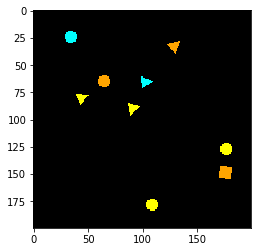

In [6]:
imag,data=create_geometry_sample(10,200,10)
plt.imshow(imag)
data,imag.shape

In [7]:
imag[:10,:10]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
  

In [16]:
def create_samples(N,N0=10,S=100,DS=5):
    images=[]
    datas=np.empty(N,dtype=np.object) 
    for i in range(N):
        img,data=create_geometry_sample(N0=N0,S=S,DS=DS)
        images.append(img)
        datas[i]=data
    images=np.array(images)
    data=datas
    return images,data


In [17]:
filename="rotated_color_shapes.p"
images,data=create_samples(10000)
file=open(data_dir+"/"+filename,"wb")
pickle.dump((images,data),file)                 

In [18]:
filename="rotated_color_shapes_test.p"
images_test,data_test=create_samples(10000)
file=open(data_dir+"/"+filename,"wb")
pickle.dump((images_test,data_test),file)   

In [20]:
filename="rotated_color_shapes.p"
file=open(data_dir+"/"+filename,"rb")
images2,data2=pickle.load(file)
images2.shape,data2.shape

((10000, 100, 100, 3), (10000,))

In [21]:
data2[0]

,colors,shapes,theta,center_x,center_y
0,yellow,rectangle,0.468041,79,59
1,cyan,rectangle,5.808961,62,56
2,orange,rectangle,1.496735,32,40
3,yellow,circle,0.432456,92,30
4,orange,rectangle,5.388134,7,82
5,yellow,triangle,5.914677,33,80
6,cyan,rectangle,5.148180,14,19
7,orange,rectangle,4.057289,52,35
8,cyan,rectangle,0.778599,59,89
9,orange,rectangle,1.512402,80,91


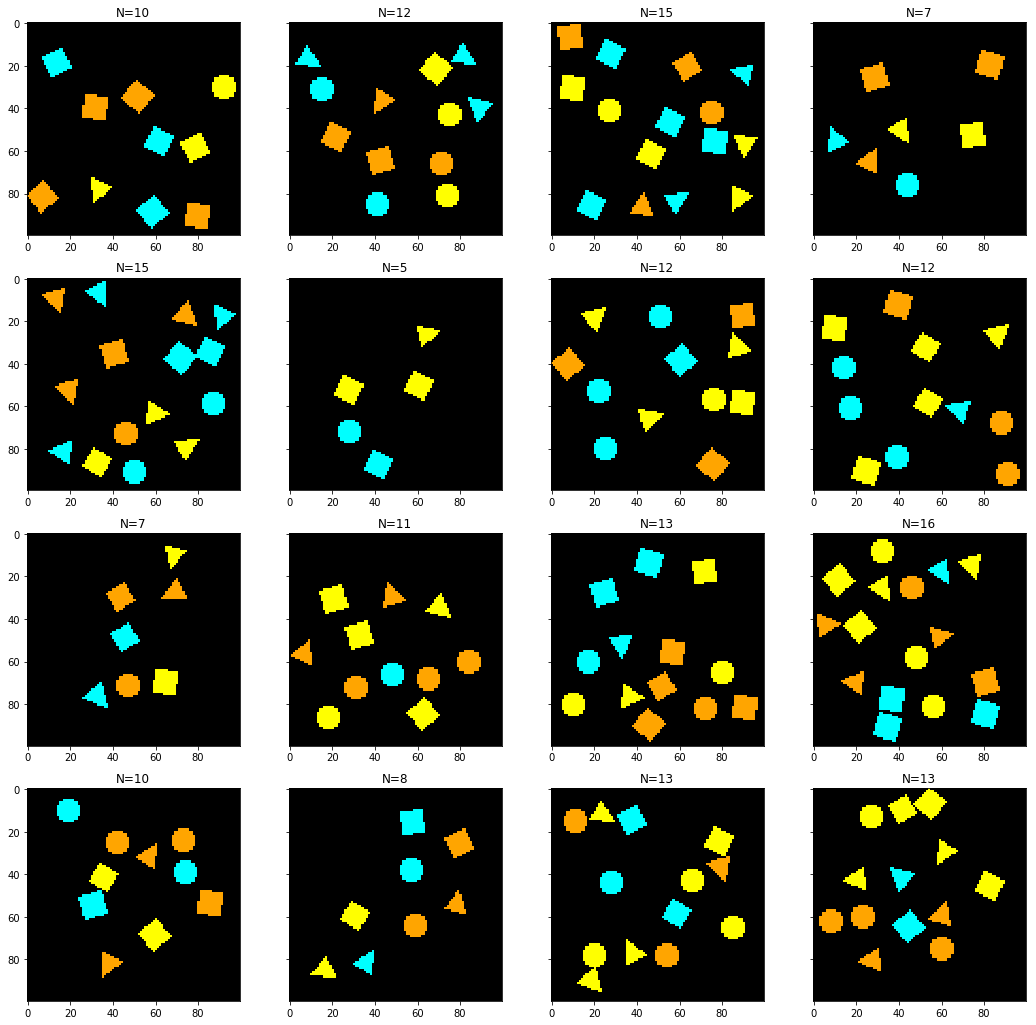

In [22]:
f, axes = plt.subplots(4, 4, sharey=True,figsize=(18,18))
for r in range(axes.shape[0]):
    for c in range(axes.shape[1]):
        img=images2[r*4+c]
        data=data2[r*4+c]
        N=len(data)
        axes[r,c].imshow(img)
        axes[r,c].set_title(f"N={N}")